In [1]:
import numpy as np
import matplotlib.pyplot as plt
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  23 Sep 2020 at 01:20 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



### Vanilla Call Option Deal Specification

In [2]:
valueDate = FinDate(1, 9, 2020)
strikePrice = 100
callOption1m = FinEquityVanillaOption(valueDate.addMonths(1), strikePrice, FinOptionTypes.EUROPEAN_CALL)
callOption6m = FinEquityVanillaOption(valueDate.addMonths(6), strikePrice, FinOptionTypes.EUROPEAN_CALL)
callOption1y = FinEquityVanillaOption(valueDate.addYears(1), strikePrice, FinOptionTypes.EUROPEAN_CALL)

### Market data

In [3]:
stockPrice = 100
dividendYield = 0.00
interestRate = 0.00
volatility = 0.20
discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.CONTINUOUS)

### Model

In [4]:
model = FinEquityModelBlackScholes(volatility)

### Delta profiles for different maturities

Text(0, 0.5, 'Option Delta')

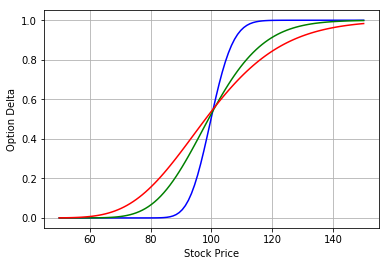

In [5]:
stockPrices = np.linspace(50,150,100)
delta1m = callOption1m.delta(valueDate, stockPrices, discountCurve, dividendYield, model)
delta6m = callOption6m.delta(valueDate, stockPrices, discountCurve, dividendYield, model)
delta1y = callOption1y.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

plt.plot(stockPrices, delta1m, 'b', stockPrices, delta6m, 'g', stockPrices, delta1y, 'r')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Delta")

### Gamma profiles for different maturities

Text(0, 0.5, 'Option Gamma')

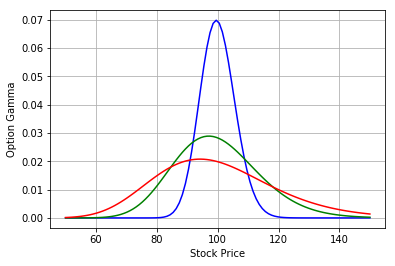

In [6]:
stockPrices = np.linspace(50,150,100)
gamma1m = callOption1m.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)
gamma6m = callOption6m.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)
gamma1y = callOption1y.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)

plt.plot(stockPrices, gamma1m, 'b', stockPrices, gamma6m, 'g', stockPrices, gamma1y, 'r')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Gamma")

### Vega profiles for different maturities

Text(0, 0.5, 'Option Vega')

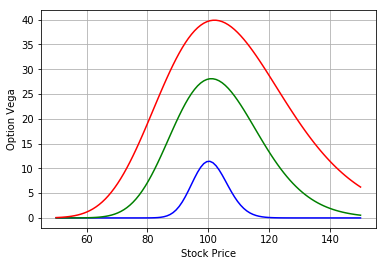

In [7]:
stockPrices = np.linspace(50,150,100)
vega1m = callOption1m.vega(valueDate, stockPrices, discountCurve, dividendYield, model)
vega6m = callOption6m.vega(valueDate, stockPrices, discountCurve, dividendYield, model)
vega1y = callOption1y.vega(valueDate, stockPrices, discountCurve, dividendYield, model)

plt.plot(stockPrices, vega1m, 'b', stockPrices, vega6m, 'g', stockPrices, vega1y, 'r')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Vega")

### Theta profiles for different maturities

Text(0, 0.5, 'Option Theta')

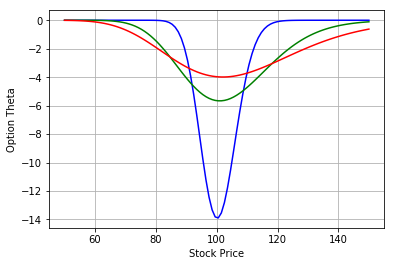

In [8]:
stockPrices = np.linspace(50,150,100)
theta1m = callOption1m.theta(valueDate, stockPrices, discountCurve, dividendYield, model)
theta6m = callOption6m.theta(valueDate, stockPrices, discountCurve, dividendYield, model)
theta1y = callOption1y.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

plt.plot(stockPrices, theta1m, 'b', stockPrices, theta6m, 'g', stockPrices, theta1y, 'r')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Theta")